# Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Exploratory-Data-Analysis](#Exploratory-Data-Analysis)
    1. [UnivariateAnalysis](#UnivariateAnalysis)    
        1. [GRE-Score](#GRE-Score)
        2. [TOEFL-Score](#TOEFL-Score)
        3. [University-Rating](#University-Rating)
        4. [SOP](#SOP)
        5. [LOR](#LOR)
        5. [CGPA](#CGPA)
        6. [Research](#Research)
    2. [Correlation](#Correlation)
4. [Data Preprocessing](#Data-Preprocessing)
    1. [Drop-irrelevant-features](#drop-irrelevant-features)
    2. [MinMaxScaler](#MinMaxScaler)
5. [Modeling](#Modeling)
    1. [Train-Test Split](#Train-Test-Split)
    2. [Model Selection](#Model-Selection)
    3. [Model Evaluation](#Model-Evaluation)
6. [Conclusion](#Conclusion)






### Introduction

**Context**

- Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

- They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**Features** 

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro

import pylab

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures


### Data-Loading

In [6]:
df = pd.read_csv('../data/Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### observations


- There are no missing values
- data needs to be normalized (scaled) before applying linear regression model
- all data are of type numberic so no encoding is required


### Exploratory-Data-Analysis

In [9]:
def plot_distributions(feature):
    plt.figure(figsize=(10,2), tight_layout=True)
    plt.subplot(1, 3, 1)
    sns.kdeplot(x=feature, data=df)
    plt.title(f'kdeplot for {feature}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=feature, data=df)
    plt.title(f'boxplot for {feature}')

    plt.subplot(1, 3, 3)
    stats.probplot(df[feature], dist="norm", plot=pylab)
    plt.show()

In [10]:
def test_normality(feature, alpha=0.05):

    H0 = f"{feature} is normally distributed"
    H1 = f"{feature} is not normally distributed"    
    
    print(f"H0 : {H0}")
    print(f"H1 : {H1}")
    
    test_statistic, p_value = shapiro(df[feature])
    print(f"Shapiro-Wilk Test Statistic: {test_statistic}")
    print(f"p-value: {p_value}")

    # Interpretation

    print(f"alpha = {alpha}")
    
    if p_value < alpha:
         print(f"Reject the null hypothesis as p_value '{p_value}' <  alpha '{alpha}' (data is not normally distributed).")        
    else:
        print(f"Fail to reject the null hypothesis  as p_value '{p_value}' > alpha '{alpha}' (data is normally distributed).")

### GRE-Score

**observations**: 
- mean GRE score is 316
- GRE score is not normally distributed, as p_value "8.212661487050354e-05" is less than alpha=0.05 (Shapiro-Wilk) test 
- no outliers

In [11]:
feature = 'GRE Score'

In [12]:
df[feature].min(), df[feature].median(), df[feature].mean(),  df[feature].max()

(290, 317.0, 316.472, 340)

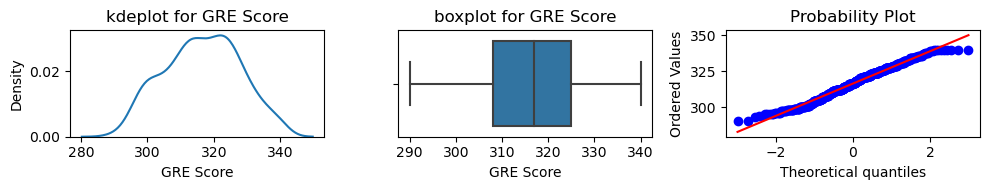

H0 : GRE Score is normally distributed
H1 : GRE Score is not normally distributed
Shapiro-Wilk Test Statistic: 0.9857442378997803
p-value: 8.212661487050354e-05
alpha = 0.05
Reject the null hypothesis as p_value '8.212661487050354e-05' <  alpha '0.05' (data is not normally distributed).


In [13]:
feature = 'GRE Score'
plot_distributions(feature)
test_normality(feature)

### TOEFL-Score

**observations**: 
- mean "TOEFL Score" is 107
- it is not normally distributed as p_value = 8.730924309929833e-05 <  is less than alpha = 0.05.
- no outliers

In [14]:
feature = 'TOEFL Score'

In [15]:
df[feature].min(), df[feature].median(), df[feature].mean(),  df[feature].max()

(92, 107.0, 107.192, 120)

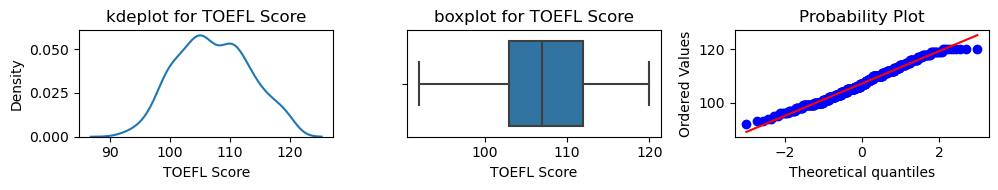

H0 : TOEFL Score is normally distributed
H1 : TOEFL Score is not normally distributed
Shapiro-Wilk Test Statistic: 0.9858347177505493
p-value: 8.730924309929833e-05
alpha = 0.05
Reject the null hypothesis as p_value '8.730924309929833e-05' <  alpha '0.05' (data is not normally distributed).


In [16]:
feature = 'TOEFL Score'
plot_distributions(feature)
test_normality(feature)

### University-Rating

**observations**: 
- rating 3 with 32.4 % values, means have high average rating
- only 6.8% has rated high

In [17]:
df[feature].nunique()

29

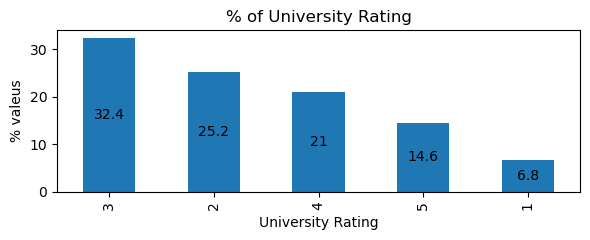

In [18]:
feature = 'University Rating'
plt.figure(figsize=(6,2.5), tight_layout=True)
ax = (df[feature].value_counts(normalize=True)*100).plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='center')
plt.ylabel("% valeus")
plt.title(f"% of {feature}")
plt.show()

### SOP 
Statement of Purpose Strength

**observations**: 
- it is not normally distributed as p_value = 9.5915581033168e-11 < 0.05 alpha (data is not normally distributed).
- no outliers

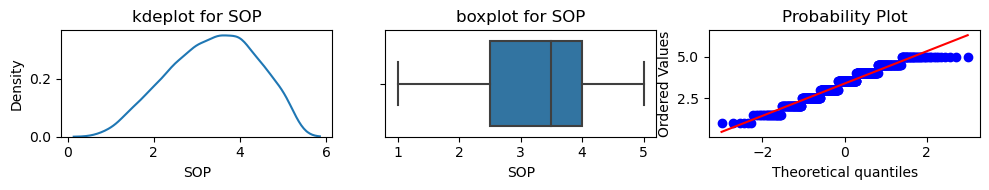

H0 : SOP is normally distributed
H1 : SOP is not normally distributed
Shapiro-Wilk Test Statistic: 0.957966685295105
p-value: 9.5915581033168e-11
alpha = 0.05
Reject the null hypothesis as p_value '9.5915581033168e-11' <  alpha '0.05' (data is not normally distributed).


In [19]:
feature = 'SOP'
plot_distributions(feature)
test_normality(feature)

### LOR
Letter of Recommendation

**observations**: 
- it is not normally distributed as p_value = 2.7075374928187124e-11 < 0.05 alpha (data is not normally distributed).
- no outliers

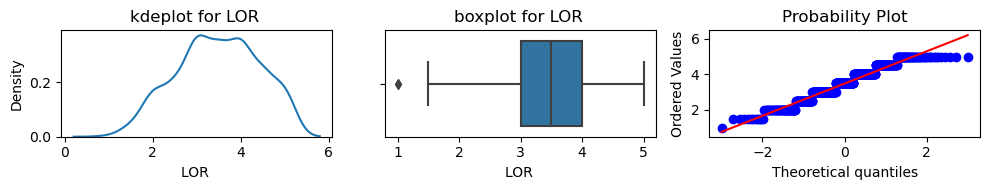

H0 : LOR  is normally distributed
H1 : LOR  is not normally distributed
Shapiro-Wilk Test Statistic: 0.9544847011566162
p-value: 2.7075374928187124e-11
alpha = 0.05
Reject the null hypothesis as p_value '2.7075374928187124e-11' <  alpha '0.05' (data is not normally distributed).


In [20]:
feature = 'LOR '
plot_distributions(feature)
test_normality(feature)

### CGPA

**observations**: 
- it is not normally distributed as p_value = '0.010292120277881622' <  alpha '0.05' (data is not normally distributed).
- no outliers

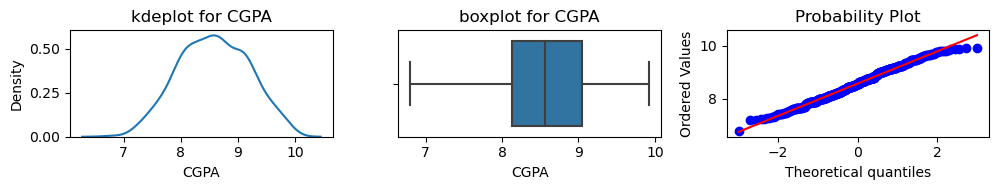

H0 : CGPA is normally distributed
H1 : CGPA is not normally distributed
Shapiro-Wilk Test Statistic: 0.9922108054161072
p-value: 0.010292120277881622
alpha = 0.05
Reject the null hypothesis as p_value '0.010292120277881622' <  alpha '0.05' (data is not normally distributed).


In [21]:
feature = 'CGPA'
plot_distributions(feature)
test_normality(feature)

### Research

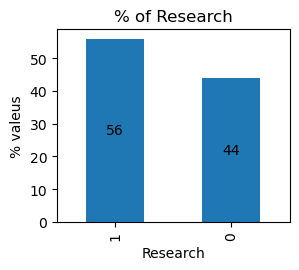

In [23]:
feature = 'Research'
plt.figure(figsize=(3,2.5))
ax = (df[feature].value_counts(normalize=True)*100).plot(kind='bar')
ax.bar_label(ax.containers[0], label_type='center')
plt.ylabel("% valeus")
plt.title(f"% of {feature}")
plt.show()

C:\Users\Upendra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


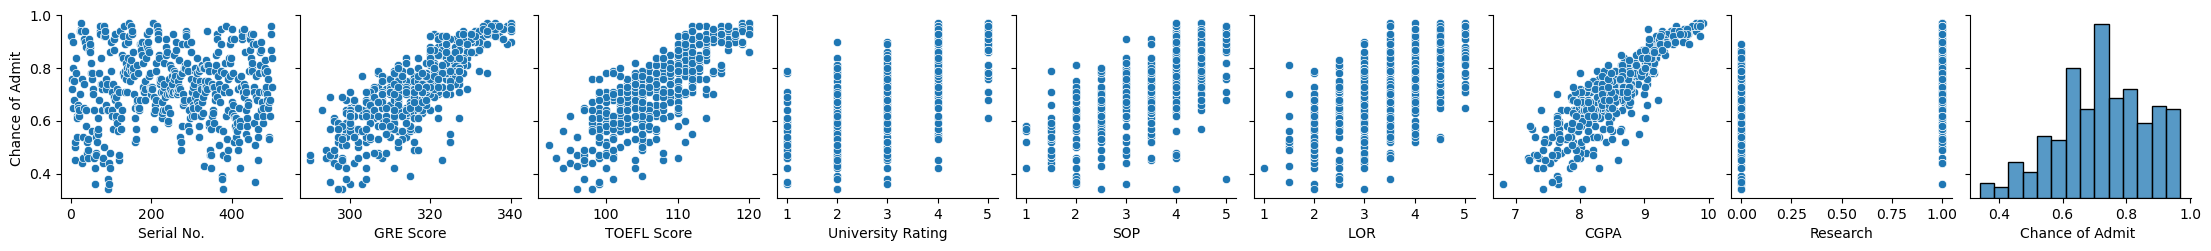

In [24]:
sns.pairplot(df, y_vars='Chance of Admit ')
plt.show()

### Correlation

<Axes: >

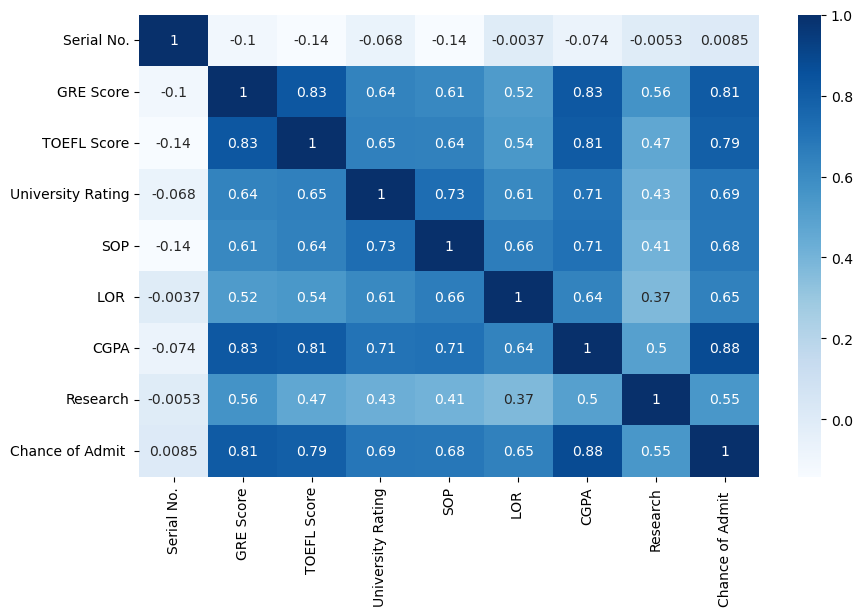

In [25]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

**Observations**
- Serial No feature can be deleated as it has no significance

## Data Preprocessing

### drop-irrelevant-features


In [26]:
df = df.drop(columns='Serial No.')

In [29]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
X = df.drop(columns='Chance of Admit ')
y = df['Chance of Admit ']

### MinMaxScaler


In [37]:
min_max_scaler  = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_X_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


## Modeling

In [38]:
def adj_r2(r2, n, p):    
    ''' n is the sample size and p is the number of independent variables'''
    return 1-(1-r2)*(n-1)/(n-p-1)

### Train-Test-Split

In [39]:
X = df_X_scaled
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400,), (100,))

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [42]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

In [55]:
# Predict on the training set
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2(r2_train, X_train.shape[0], X_train.shape[1])

print(f"Training MSE: {np.round(mse_train*100, 2)} %")
print(f"Training R-squared: {np.round(r2_train, 3)}")
print(f"Training adj R-squared: {np.round(adj_r2_train, 3)}")

Training MSE: 0.35 %
Training R-squared: 0.821
Training adj R-squared: 0.818


In [56]:
# Predict on the test set
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adj_r2(r2_test, X_test.shape[0], X_test.shape[1])

print(f"Test MSE: {np.round(mse_test*100, 2)} %")
print(f"Test R-squared: {np.round(r2_test, 3)}")
print(f"Test adj R-squared: {np.round(adj_r2_test,2)}")

Test MSE: 0.37 %
Test R-squared: 0.819
Test adj R-squared: 0.81


In [57]:
model.coef_, model.intercept_

(array([0.12172192, 0.08388445, 0.01027519, 0.00725476, 0.06895193,
        0.3510845 , 0.02402679]),
 0.3469650583945579)

In [334]:
# Polynomial features transformation
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate MSE and R-squared for training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate MSE and R-squared for test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Training R-squared: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R-squared: {r2_test}")

Training MSE: 0.003236261171372311
Training R-squared: 0.8357962945524071
Test MSE: 0.003547838694844323
Test R-squared: 0.8265115552643363


In [335]:
model.coef_, model.intercept_

(array([-1.75410383e-16,  1.78252304e-01,  1.48465638e-01, -1.17044122e-01,
        -4.78665099e-03,  1.31460252e-01,  4.55235439e-01, -1.24752129e-02,
         4.43177990e-02, -6.61478462e-02,  6.08983828e-02,  9.21577183e-02,
         1.73633695e-01, -4.80792476e-01, -1.59710664e-02, -3.77958501e-02,
         3.15747064e-03,  2.21799435e-01, -2.02998468e-01, -2.20701579e-02,
         4.29046962e-02, -2.28794842e-03,  2.83874013e-01, -4.58530607e-02,
        -8.37568974e-02,  7.31276959e-03, -2.59271476e-01,  6.91703649e-02,
        -3.07856256e-02, -2.31104843e-02,  6.05768244e-02, -2.37371855e-01,
        -1.06099437e-02,  2.78919184e-01,  8.98818265e-02, -1.24752129e-02]),
 0.319757822945539)